In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [8]:
#Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [10]:
#Perform API Calls

In [11]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | clarence town
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | trat
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | faya
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | vestmannaeyjar
Processing Record 10 of Set 1 | phalaborwa
Processing Record 11 of Set 1 | kokoda
Processing Record 12 of Set 1 | sheridan
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | dakar
City not found. Skipping...
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | luanda
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | padang


Processing Record 42 of Set 4 | yulara
City not found. Skipping...
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | sibolga
City not found. Skipping...
Processing Record 47 of Set 4 | forestville
Processing Record 48 of Set 4 | hovd
Processing Record 49 of Set 4 | kandrian
Processing Record 1 of Set 5 | salisbury
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | sanmenxia
City not found. Skipping...
Processing Record 4 of Set 5 | ribeira grande
City not found. Skipping...
Processing Record 5 of Set 5 | san patricio
City not found. Skipping...
Processing Record 6 of Set 5 | kabo
Processing Record 7 of Set 5 | ipora
Processing Record 8 of Set 5 | west wendover
Processing Record 9 of Set 5 | mosta
Processing Record 10 of Set 5 | namie
City not found. Skipping...
Processing Record 11 of Set 5 | karratha
Processing Record 12 of Set 5 | ilulissat
Processing Record 13

Processing Record 29 of Set 8 | pochutla
Processing Record 30 of Set 8 | daru
City not found. Skipping...
Processing Record 31 of Set 8 | warmbad
Processing Record 32 of Set 8 | kapuskasing
Processing Record 33 of Set 8 | hofn
Processing Record 34 of Set 8 | smithers
Processing Record 35 of Set 8 | eyl
City not found. Skipping...
Processing Record 36 of Set 8 | bairiki
Processing Record 37 of Set 8 | fergus falls
Processing Record 38 of Set 8 | ossora
Processing Record 39 of Set 8 | mana
Processing Record 40 of Set 8 | ovruch
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | ucluelet
City not found. Skipping...
Processing Record 43 of Set 8 | mackenzie
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | coihaique
City not found. Skipping...
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | santiago del estero
Processing Record 48 of Set 8 | raudeberg
Processing Record 49 of Set 8 | dicabisagan
City not found. Skipp

In [12]:
 #Convert Raw Data to DataFrame

In [13]:
# create a dictionary for establishing dataframe
weather = {
    "City":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates
}

# establish dataframe
weather_df = pd.DataFrame(weather)

# show the top of the dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clarence town,42.9767,-78.5920,10.99,80,23,1.99,US,1613098309
1,tasiilaq,65.6145,-37.6368,19.40,73,75,26.46,GL,1613098309
2,puerto ayora,36.5939,-6.2330,60.80,88,75,9.22,ES,1613098310
3,acapulco,16.8634,-99.8901,77.00,78,1,6.91,MX,1613098220
4,trat,12.5000,102.5000,86.00,47,0,6.91,TH,1613098310


In [14]:
# mean, median, variance, standard deviation, min, max, quartiles
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,21.437473,15.754783,47.624272,73.170132,55.739130,7.980359,1.613098e+09
std,32.605321,88.241511,32.111396,19.486723,39.536903,6.243665,1.109055e+02
min,-54.800000,-179.166700,-43.600000,16.000000,0.000000,0.540000,1.613098e+09
25%,-5.795000,-55.518100,23.000000,65.000000,14.000000,3.510000,1.613098e+09
50%,27.016700,18.260300,58.390000,78.000000,75.000000,6.640000,1.613098e+09
75%,48.853400,82.583300,74.250000,88.000000,92.000000,10.360000,1.613098e+09
max,78.218600,179.316700,91.180000,100.000000,100.000000,41.430000,1.613098e+09


In [15]:
# output data to csv
weather_df.to_csv(output_data_file)

In [16]:
#Plotting the Data

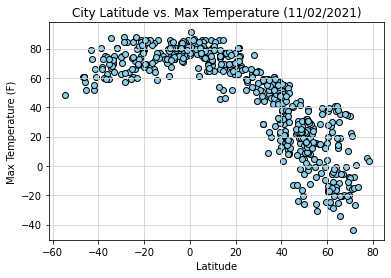

In [20]:
#Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (11/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig1.png")
plt.show()

In [21]:
#Latitude vs. Humidity Plot

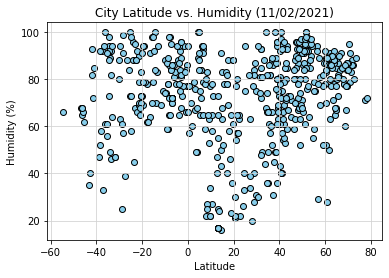

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (11/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig2.png")
plt.show()

In [24]:
#Latitude vs. Cloudiness Plot

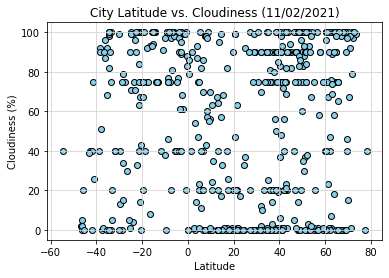

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (11/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()

In [25]:
#Latitude vs. Wind Speed Plot

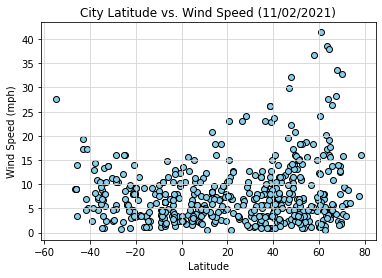

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (11/02/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()

In [27]:
#Linear Regression

In [68]:
def makeLinRegression(df, x_Col, y_Col):
    #first, perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
   #setup the linear regression line x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    #plot the scatterplot with the raw data
    weather_df_axes = weather_df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {}"
                        .format(y_Col, x_Col, weather_df["Date"].iloc[0]))

    #add the best fit lines to the plot as a solid red line
    weather_df_axes.plot(regr_line_x, regr_line_y, 'r')

    #output best-fit line information
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    #return the axes object for the plots, in case any changes need to be made
    return weather_df_axes

In [69]:
# Create Northern and Southern Hemisphere DataFrames

#first, get a subset of all the cities that are on or north of the equator for the Northern Hemisphere DataFrame
north = weather_df.loc[weather_df["Lat"] >= 0]
northern_count = len(north)

#first, get a subset of all the cities that are south of the equator for the Southern Hemisphere DataFrame
south = weather_df.loc[weather_df["Lat"] < 0]
southern_count = len(south)

print("There are {} cities in the northern hemisphere out of {} cities total"
     .format(northern_count, len(cities)))
print("There are {} cities in the southern hemisphere out of {} cities total"
     .format(southern_count, len(cities)))

There are 372 cities in the northern hemisphere out of 602 cities total
There are 157 cities in the southern hemisphere out of 602 cities total


In [70]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-1.38x+90.26
The r-squared correlation coefficient for this line is -0.86


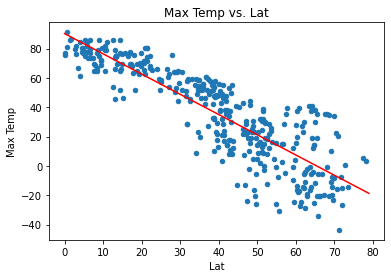

In [71]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(north["Lat"], 
                                                           north["Max Temp"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = north.plot(kind="scatter", x="Lat", 
                                       y="Max Temp", 
                                       title="Max Temp vs. Lat".
                                       format(weather_df["Date"].iloc[0]))
                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("output_data/Temp_vs_Latitude_N.png")

In [72]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.33x+80.42
The r-squared correlation coefficient for this line is 0.52


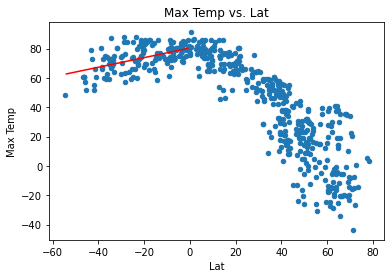

In [73]:
s_temp_lat_axes = makeLinRegression(south, "Lat", "Max Temp")
s_temp_lat_axes.get_figure().savefig("output_data/Temp_vs_Latitude_S.png")

In [74]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.40x+55.92
The r-squared correlation coefficient for this line is 0.39


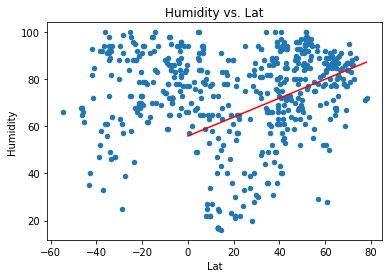

In [75]:
n_humidity_lat_axes = makeLinRegression(north, "Lat", "Humidity")
n_humidity_lat_axes.get_figure().savefig("output_data/Humidity_vs_Latitude_N.png")

In [76]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.29x+82.79
The r-squared correlation coefficient for this line is 0.25


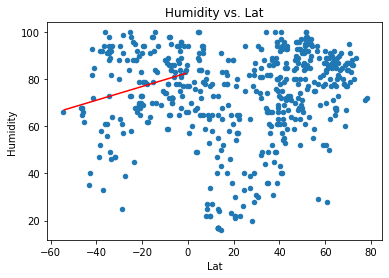

In [77]:
s_humidity_lat_axes = makeLinRegression(south, "Lat", "Humidity")
s_humidity_lat_axes.get_figure().savefig("output_data/Humidity_vs_Latitude_S.png")

In [78]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.52x+30.55
The r-squared correlation coefficient for this line is 0.26


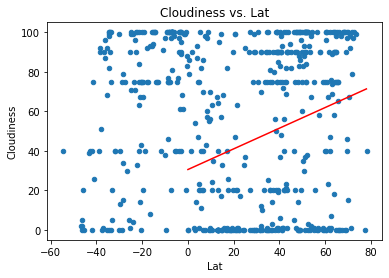

In [79]:
n_cloudiness_lat_axes = makeLinRegression(north, "Lat", "Cloudiness")
n_cloudiness_lat_axes.get_figure().savefig("output_data/Cloudiness_vs_Latitude_N.png")

In [80]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=1.18x+90.76
The r-squared correlation coefficient for this line is 0.45


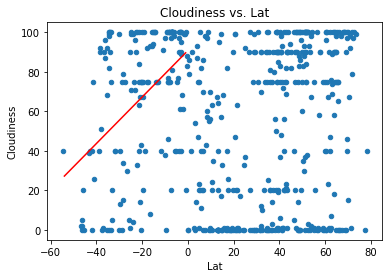

In [83]:
s_cloudiness_lat_axes = makeLinRegression(south, "Lat", "Cloudiness")
s_cloudiness_lat_axes.get_figure().savefig("output_data/Cloudiness_vs_Latitude_S.png")

In [84]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.06x+5.89
The r-squared correlation coefficient for this line is 0.19


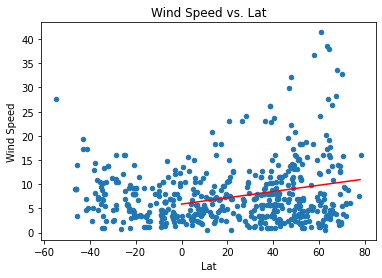

In [85]:
n_wind_lat_axes = makeLinRegression(north, "Lat", "Wind Speed")
n_wind_lat_axes.get_figure().savefig("output_data/Wind_vs_Latitude_N.png")

In [86]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.11x+4.80
The r-squared correlation coefficient for this line is -0.34


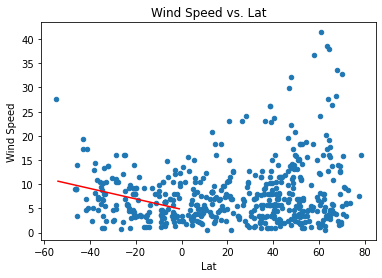

In [87]:
s_wind_lat_axes = makeLinRegression(south, "Lat", "Wind Speed")
s_wind_lat_axes.get_figure().savefig("output_data/Wind_vs_Latitude_S.png")